### 3.2 Data Preparation

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [387]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [388]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')

In [389]:
str_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in str_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [390]:
df.isnull().sum()
df.totalcharges = df.totalcharges.fillna(0)
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [391]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [392]:
df.churn = (df.churn == 'yes').astype(int)

### 3.3 Setting up the validation framework

In [393]:
from sklearn.model_selection import train_test_split
df_fulltrain, df_test = train_test_split(df, test_size = 0.2, random_state =1)
df_train, df_val = train_test_split(df_fulltrain, test_size = 0.25, random_state =1)
df_fulltrain.shape, df_test.shape, df_val.shape
df.nunique()
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
fields = categorical + numerical
df_fulltrain.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.churn
y_val = df_val.churn
y_test = df_test.churn
df_train = df_train[fields]
df_val = df_val[fields]
df_test = df_test[fields]

### 3.4 Training your model

In [394]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dict_train = df_train.to_dict(orient='records')
dv.fit(dict_train)
X_train = dv.transform(dict_train)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000, C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=100000)

In [395]:
w = model.coef_[0]
w

array([ 6.84563865e-01,  3.85627805e-02, -6.82106720e-01,  5.59874182e-02,
       -1.49674921e-02,  1.13934134e-01, -1.59961569e-01,  8.70473614e-02,
        3.94140853e-02,  1.60584095e-03, -4.97473553e-01,  6.98455049e-01,
       -1.59961569e-01, -1.79930514e-02, -1.87166364e-01,  6.61224966e-02,
        1.62063794e-01,  1.16725547e-01, -1.59961569e-01,  8.42559483e-02,
        2.85032504e-01, -1.59961569e-01, -8.40510084e-02, -1.61238079e-01,
        2.02258005e-01, -4.45575410e-02,  8.55774672e-02, -5.15350530e-02,
       -2.96985505e-03,  1.06354594e-01, -1.08297599e-02,  6.61224966e-02,
       -2.51025705e-02,  1.93985926e-01, -9.41528635e-02, -1.59961569e-01,
        2.95134358e-01, -5.39335450e-02, -1.59961569e-01,  2.54915040e-01,
        2.35033033e-01, -1.59961569e-01, -3.40515382e-02, -6.85347146e-02,
        3.95932211e-04])

In [396]:
w0 = model.intercept_[0]
w0

np.float64(-0.045323382519725265)

In [397]:
dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)
val_predict = (model.predict_proba(X_val)[:,1].round(2)) > 0.5
(val_predict == y_val).mean()

np.float64(0.8055358410220014)

### 3.5 Retrain and Use model

In [398]:
dict_fulltrain = df_fulltrain[fields].to_dict(orient='records')
X_fulltrain = dv.transform(dict_fulltrain)
y_fulltrain = df_fulltrain.churn.values
model = LogisticRegression(max_iter=100000, C=1)
model.fit(np.concatenate([X_train,X_val]), np.concatenate([y_train,y_val]))
w = model.coef_[0]
w0 = model.intercept_[0]
w0

np.float64(-0.12307907358470903)

In [399]:
dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)
predict = (model.predict_proba(X_test)[:,1].round(2)) >= 0.5
(predict == y_test).mean()

np.float64(0.8105039034776437)

### 4.1 Confusion Table

In [400]:
tp = ((val_predict == y_val) & (val_predict == 1)).sum()
tp

np.int64(212)

In [401]:
fp = ((val_predict != y_val) & (val_predict == 1)).sum()
fp

np.int64(100)

In [402]:
tn = ((val_predict == y_val) & (val_predict == 0)).sum()
tn

np.int64(923)

In [403]:
fn = ((val_predict != y_val) & (val_predict == 0)).sum()

In [404]:
tp + fp + tn + fn

np.int64(1409)

In [405]:
len(val_predict)

1409

In [406]:
cm = np.array([
    [tn, fp],
    [fn,tp]])
cm

array([[923, 100],
       [174, 212]])

In [407]:
(cm/cm.sum()).round(2)

array([[0.66, 0.07],
       [0.12, 0.15]])

### 4.2 Precison and Recall

In [408]:
precision = tp/(tp+fp)
precision

np.float64(0.6794871794871795)

In [409]:
recall = tp/(tp+fn)
recall

np.float64(0.5492227979274611)

### 4.3 ROC Curves

In [410]:


def scores_roc(y, y_predict):
    treasholds = np.linspace(0,1, 101)
    scores = []
    for t in treasholds:
        predict = y_predict >= t
        tp = ((predict == y) & (predict == 1)).sum()
        fp = ((predict != y) & (predict == 1)).sum()
        tn = ((predict == y) & (predict == 0)).sum()
        fn = ((predict != y) & (predict == 0)).sum()
        tpr = tp / (tp+fn)
        fpr = fp / (fp + tn)
        scores.append((t, tn, fp, fn, tp, tpr,fpr))
    return scores
   
    

In [411]:
val_predict = (model.predict_proba(X_val)[:,1].round(2))
scores = scores_roc(y_val, val_predict)
df_scores = pd.DataFrame(scores, columns = ['t','tn','fp','fn','tp','tpr','fpr'])
df_scores

,t,tn,fp,fn,tp,tpr,fpr
0,0.00,0,1023,0,386,1.000000,1.000000
1,0.01,70,953,0,386,1.000000,0.931574
2,0.02,188,835,1,385,0.997409,0.816227
3,0.03,241,782,4,382,0.989637,0.764418
4,0.04,294,729,4,382,0.989637,0.712610
...,...,...,...,...,...,...,...
96,0.96,1023,0,386,0,0.000000,0.000000
97,0.97,1023,0,386,0,0.000000,0.000000
98,0.98,1023,0,386,0,0.000000,0.000000
99,0.99,1023,0,386,0,0.000000,0.000000


Text(0.5, 1.0, 'ROC Curve for our Model')

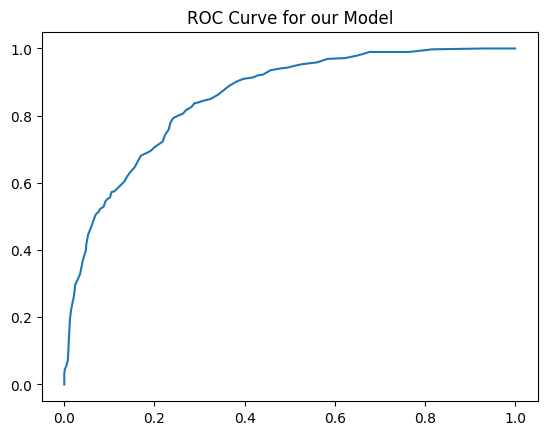

In [412]:
plt.plot(df_scores.fpr, df_scores.tpr)
plt.title('ROC Curve for our Model')

In [413]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, len(y_val))
scores_rand = scores_roc(y_val, y_rand)
df_scores_rand = pd.DataFrame(scores_rand,columns = ['t','tn','fp','fn','tp','tpr','fpr'])
df_scores_rand

,t,tn,fp,fn,tp,tpr,fpr
0,0.00,0,1023,0,386,1.000000,1.000000
1,0.01,10,1013,4,382,0.989637,0.990225
2,0.02,30,993,7,379,0.981865,0.970674
3,0.03,44,979,11,375,0.971503,0.956989
4,0.04,54,969,14,372,0.963731,0.947214
...,...,...,...,...,...,...,...
96,0.96,982,41,372,14,0.036269,0.040078
97,0.97,987,36,375,11,0.028497,0.035191
98,0.98,1004,19,378,8,0.020725,0.018573
99,0.99,1016,7,380,6,0.015544,0.006843


Text(0.5, 1.0, 'ROC Curve for a random model')

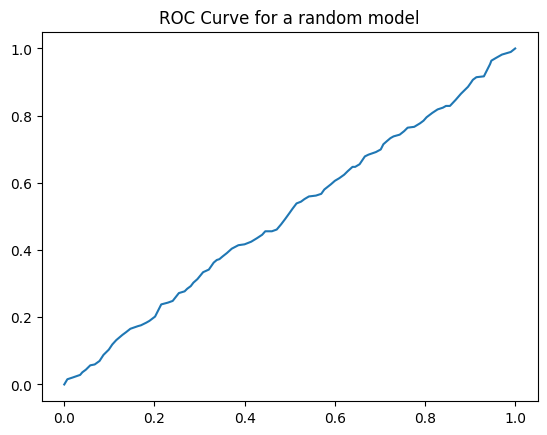

In [414]:
plt.plot(df_scores_rand.fpr, df_scores_rand.tpr)
plt.title('ROC Curve for a random model')

In [415]:
npos = (y_val == 1).sum()
nneg = (y_val == 0).sum()
npos, nneg

(np.int64(386), np.int64(1023))

In [416]:
y_ideal = np.repeat([0,1], [nneg,npos])

In [417]:
y_ideal_pred = np.linspace(0,1, len(y_val))
scores_ideal = scores_roc(y_ideal, y_ideal_pred)
df_scores_ideal = pd.DataFrame(scores_ideal, columns = ['t','tn','fp','fn','tp','tpr','fpr'])


Text(0.5, 1.0, 'ROC Curve for a the ideal model')

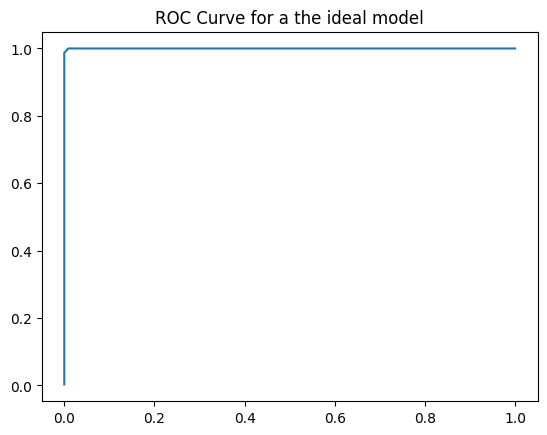

In [418]:
plt.plot(df_scores_ideal.fpr, df_scores_ideal.tpr)
plt.title('ROC Curve for a the ideal model')

### 4.4 Putting Everythin together

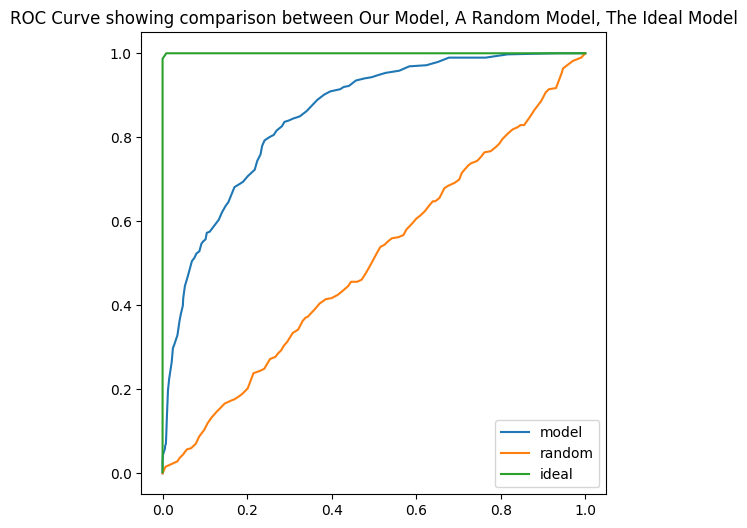

In [419]:
plt.figure(figsize =(6,6))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_scores_rand.fpr, df_scores_rand.tpr, label='random')
plt.plot(df_scores_ideal.fpr, df_scores_ideal.tpr, label='ideal')
plt.title('ROC Curve showing comparison between Our Model, A Random Model, The Ideal Model')
plt.legend()


### 4.5 calculation ROC curves using scikit learn

In [420]:
from sklearn.metrics import roc_curve
def scores_roc(y, y_predict):
    fpr, tpr, treasholds = roc_curve(y, y_predict)
    scores = []
    for t in treasholds:
        predict = y_predict >= t
        tp = ((predict == y) & (predict == 1)).sum()
        fp = ((predict != y) & (predict == 1)).sum()
        tn = ((predict == y) & (predict == 0)).sum()
        fn = ((predict != y) & (predict == 0)).sum()
        scores.append((t, tn, fp, fn, tp))
    scores = np.column_stack([scores, tpr, fpr])
    return scores
val_predict = (model.predict_proba(X_val)[:,1].round(2))
scores = scores_roc(y_val, val_predict)
df_scores = pd.DataFrame(scores, columns = ['t','tn','fp','fn','tp','tpr','fpr'])



In [421]:
y_rand = np.random.uniform(0,1, len(y_val))
scores_rand = scores_roc(y_val, y_rand)
df_scores_rand = pd.DataFrame(scores_rand,columns = ['t','tn','fp','fn','tp','tpr','fpr'])

In [422]:
y_ideal = np.repeat([0,1], [nneg,npos])
y_ideal_pred = np.linspace(0,1, len(y_val))
scores_ideal = scores_roc(y_ideal, y_ideal_pred)
df_scores_ideal = pd.DataFrame(scores_ideal, columns = ['t','tn','fp','fn','tp','tpr','fpr'])


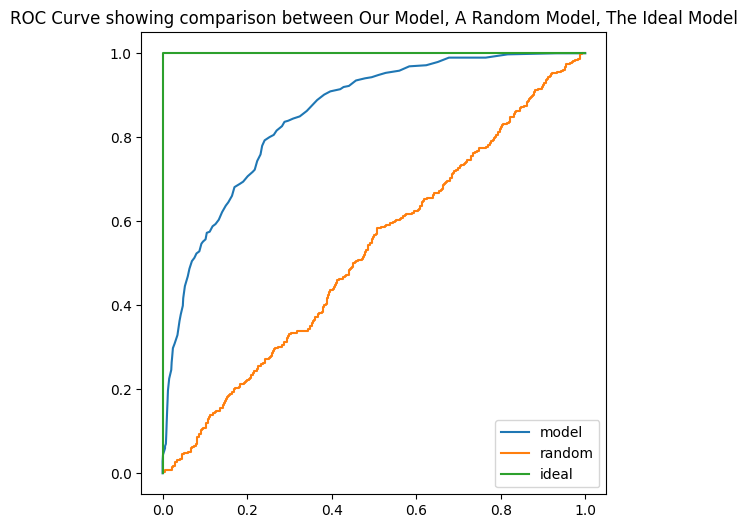

In [423]:
plt.figure(figsize =(6,6))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_scores_rand.fpr, df_scores_rand.tpr, label='random')
plt.plot(df_scores_ideal.fpr, df_scores_ideal.tpr, label='ideal')
plt.title('ROC Curve showing comparison between Our Model, A Random Model, The Ideal Model')
plt.legend()

### 4.6 Area under the ROC curve

In [424]:
from sklearn.metrics import auc
area = auc(df_scores.fpr, df_scores.tpr)
area_rand = auc(df_scores_rand.fpr, df_scores_rand.tpr)
area_ideal = auc(df_scores_ideal.fpr, df_scores_ideal.tpr)
area, area_rand, area_ideal

(np.float64(0.8531305871686952),
 np.float64(0.5226576309645004),
 np.float64(1.0))

### 4.7 Area under the ROC curve method 2

In [425]:
from sklearn.metrics import roc_auc_score
area = roc_auc_score(y_val, val_predict)
area_rand = roc_auc_score(y_val, y_rand)
area_ideal = roc_auc_score(y_ideal, y_ideal_pred)
area, area_rand, area_ideal

(np.float64(0.8531305871686952),
 np.float64(0.5226576309645004),
 np.float64(1.0))